<a href="https://colab.research.google.com/github/ananthakrishnanpta/Audio-classification-project-DS/blob/main/PCA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [326]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [327]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/techis-ds-wiki/DS/Step 2-1 Linear Regression/train.csv')

In [328]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [329]:
data.shape

(1460, 81)

In [369]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [331]:
df=data.select_dtypes(['float64','int64'])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [332]:
df.drop(['Id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [333]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [334]:
miss_val=df.isnull().sum()

In [335]:
miss_val[miss_val>0].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [336]:
columns=['LotFrontage','GarageYrBlt','MasVnrArea']

for col in columns:
  df[col]=df[col].fillna(df[col].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [337]:
df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [338]:
data_corr=df.corr()

In [339]:
data_corr=data_corr['SalePrice'][:-1]
df_corr=data_corr[abs(data_corr)>=0.60].sort_values(ascending=True)

In [340]:
df_corr

1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
Name: SalePrice, dtype: float64

In [341]:
df = df[['1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','OverallQual','SalePrice']]

In [342]:
df.head()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,856,856,548,2,1710,7,208500
1,1262,1262,460,2,1262,6,181500
2,920,920,608,2,1786,7,223500
3,961,756,642,3,1717,7,140000
4,1145,1145,836,3,2198,8,250000


## **Checking for outliers**

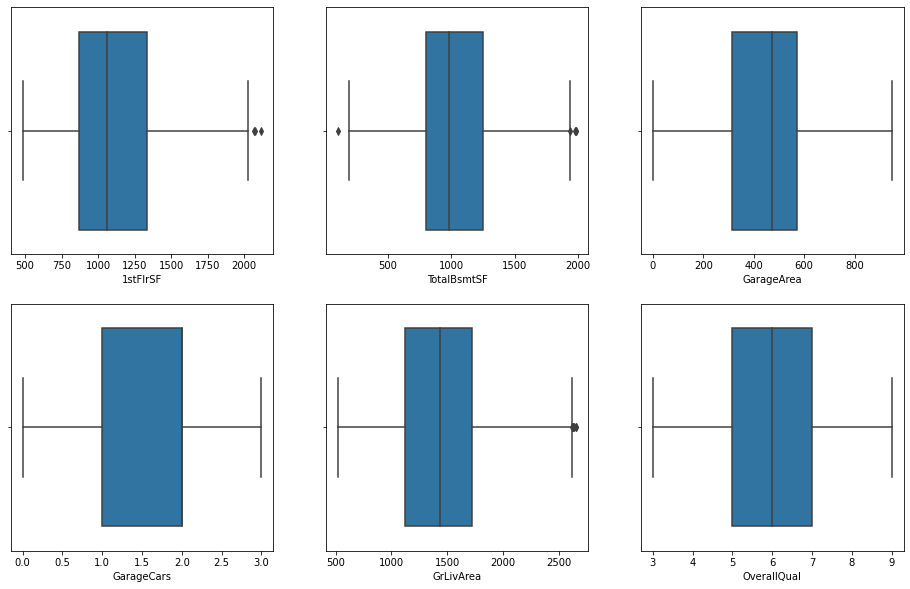

In [366]:
plt.figure(figsize=(16,10))

for i in enumerate(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea','OverallQual']):
  plt.subplot(2,3,i[0]+1)
  sns.boxplot(x=i[1],hue='SalePrice',data=df)

Removing Outliers

In [345]:
Q1 , Q2 , Q3 = np.percentile(df['1stFlrSF'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df  = df[df['1stFlrSF']>low_lim]
df  = df[df['1stFlrSF']<up_lim]

In [346]:
Q1 , Q2 , Q3 = np.percentile(df['TotalBsmtSF'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df  = df[df['TotalBsmtSF']>low_lim]
df  = df[df['TotalBsmtSF']<up_lim]

In [347]:
Q1 , Q2 , Q3 = np.percentile(df['GarageArea'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df  = df[df['GarageArea']>low_lim]
df  = df[df['GarageArea']<up_lim]

In [348]:
Q1 , Q2 , Q3 = np.percentile(df['GarageCars'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df  = df[df['GarageCars']>low_lim]
df  = df[df['GarageCars']<up_lim]

In [349]:
Q1 , Q2 , Q3 = np.percentile(df['GrLivArea'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df  = df[df['GrLivArea']>low_lim]
df  = df[df['GrLivArea']<up_lim]

In [350]:
Q1 , Q2 , Q3 = np.percentile(df['OverallQual'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df  = df[df['OverallQual']>low_lim]
df  = df[df['OverallQual']<up_lim]

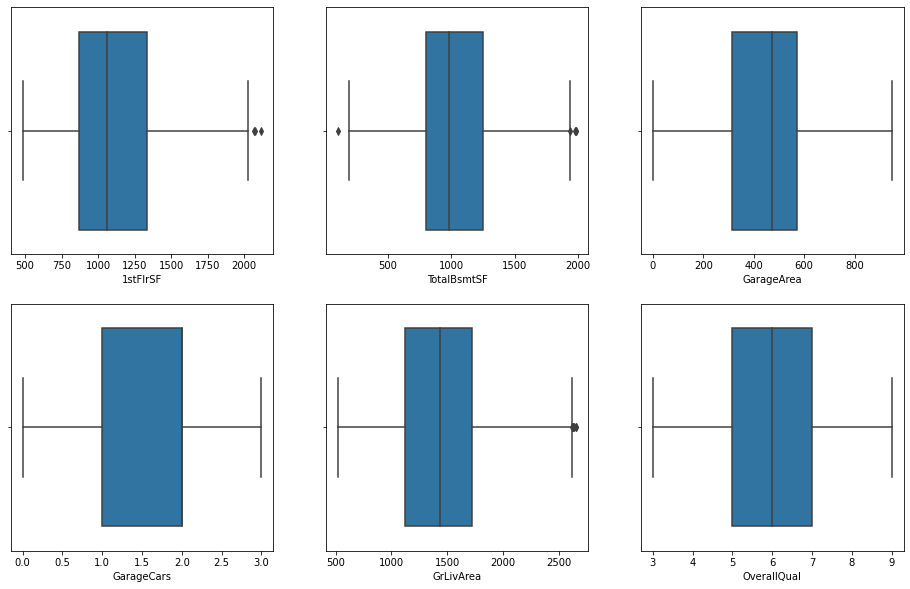

In [351]:
plt.figure(figsize=(16,10))

for i in enumerate(features):
  plt.subplot(2,3,i[0]+1)
  sns.boxplot(x = i[1],hue= 'SalePrice',data = df)

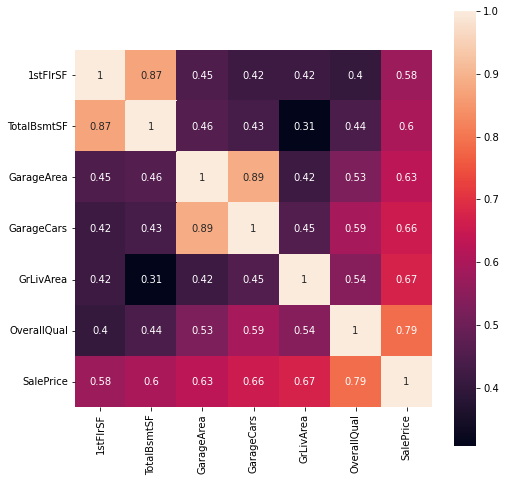

In [352]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,square=True)

In [353]:
data_features =df.columns

In [354]:
data_features

Index(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual', 'SalePrice'],
      dtype='object')

In [355]:
scale=MinMaxScaler()
scale.fit(df)

MinMaxScaler()

In [356]:
trans=scale.transform(df)
dataset=pd.DataFrame(trans)

In [357]:
dataset.columns=data_features

In [358]:
dataset.describe()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,0.389865,0.498219,0.483084,0.574394,0.438518,0.507377,0.341181
std,0.198091,0.177186,0.205297,0.235853,0.199289,0.206480,0.153938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234394,0.369484,0.332629,0.333333,0.283505,0.333333,0.234757
50%,0.354957,0.465178,0.497360,0.666667,0.428304,0.500000,0.308813
75%,0.522644,0.610314,0.604013,0.666667,0.562324,0.666667,0.419896
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Fitting data with PCA

In [359]:
x = dataset.drop(['SalePrice'],axis=1)
y=dataset['SalePrice']

In [360]:
pca = PCA()
pca.fit(x)

PCA()

In [361]:
var = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.60485996, 0.76817486, 0.89063943, 0.96419099, 0.98481494,
       1.        ])

Text(0, 0.5, 'cumulative explained variance')

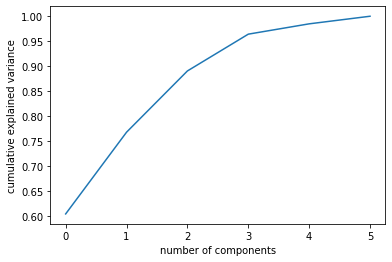

In [362]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [363]:
pca=PCA(n_components=3)
pca.fit(x)
data1 = pca.transform(x)
data1

array([[-0.10671468, -0.24298133,  0.13679878],
       [-0.08586128,  0.08071494, -0.13243193],
       [-0.17247642, -0.2189886 ,  0.12916912],
       ...,
       [-0.01059796,  0.21133761,  0.50507277],
       [ 0.36562676,  0.18543232, -0.05579588],
       [ 0.25060172,  0.2950497 , -0.04024438]])

# Fitting the data into Linear Regression and Checking the accuracy of the model :- 

In [364]:
x_train,x_test,y_train,y_test=train_test_split(data1,y,test_size=0.20)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
model_score=lr.score(x_test,y_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(pred,y_test))
print("r2 score i :- ",r2_score(pred,y_test))
print('Model_score is :- ',model_score)

Mean Absolute Error of linear regression: 0.05571606275682521
r2 score i :-  0.6877567582729875
Model_score is :-  0.7606492480089184
